# Tracking

Maps :

In [213]:
from module import getUmbraPenumbra, toSunpyMap

map_old = toSunpyMap('data/L2/imoa_03933_l2_20240319_15102678_emi1.fts.bz2')
map_new = toSunpyMap('data/L2/imoa_03933_l2_20240323_13052647_emi1.fts.bz2')

umbra_old, penumbra_old = getUmbraPenumbra(map_old)
umbra_new, penumbra_new = getUmbraPenumbra(map_new)

Labels :

In [256]:
import cv2 as cv

n_labels_old, labels_old, stats_old, centroids_old = cv.connectedComponentsWithStats(umbra_old | penumbra_old, connectivity=8)
n_labels_new, labels_new, stats_new, centroids_new = cv.connectedComponentsWithStats(umbra_new | penumbra_new, connectivity=8)

Predict :

In [270]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import RotatedSunFrame


centroid = centroids_old[1]
point = map_old.pixel_to_world(centroid[0]*u.pixel, (centroid[1])*u.pixel)

diffrot_point = SkyCoord(RotatedSunFrame(base=point, rotated_time=map_new.date))

transformed_diffrot_point = diffrot_point.transform_to(map_new.coordinate_frame)

centroid = centroids_new[2]
closest_point = map_new.pixel_to_world(centroid[0]*u.pixel, (centroid[1])*u.pixel)
transformed_diffrot_point.separation(closest_point)


<Angle 0.03229572 deg>

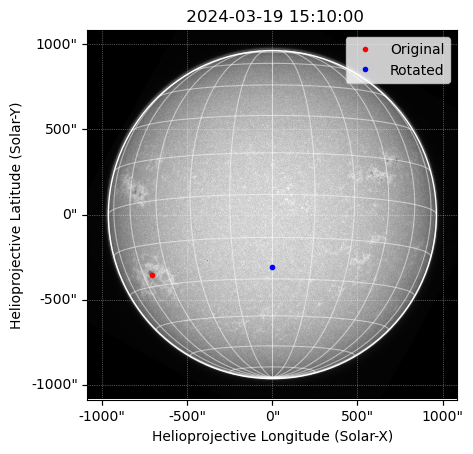

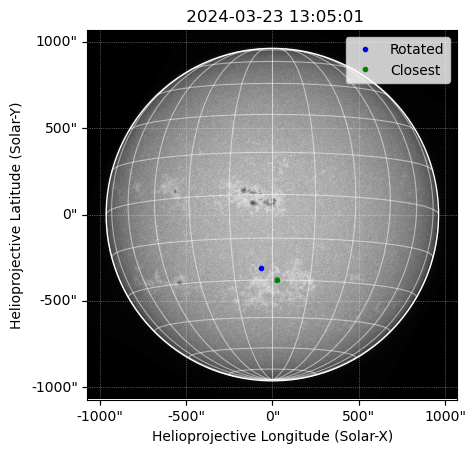

In [271]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection=map_old)
map_old.plot(axes=ax)
map_old.draw_limb(axes=ax)
map_old.draw_grid(axes=ax)
ax.plot_coord(point, 'r.', fillstyle='full', label='Original')
ax.plot_coord(transformed_diffrot_point, 'b.', fillstyle='full', label='Rotated')
ax.legend(loc='upper right')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection=map_new)
map_new.plot(axes=ax)
map_new.draw_limb(axes=ax)
map_new.draw_grid(axes=ax)
ax.plot_coord(transformed_diffrot_point, 'b.', fillstyle='full', label='Rotated')
ax.plot_coord(closest_point, 'g.', fillstyle='full', label='Closest')
ax.legend(loc='upper right')

plt.show()